# Own Case Study 1:  Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
https://www.kaggle.com/c/zillow-prize-1/data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

df=pd.read_csv("properties_2016.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 58 columns):
parcel_id                          1048575 non-null int64
air_conditioning_type_id           286338 non-null float64
architectural_style_type_id        2054 non-null float64
basement_sqft                      560 non-null float64
bathroom_cnt                       1048567 non-null float64
bedroom_cnt                        1048572 non-null float64
building_class_type_id             4465 non-null float64
building_quality_type_id           684919 non-null float64
calculated_bath_nbr                1007146 non-null float64
deck_type_id                       6011 non-null float64
finished_floor_1square_feet        71845 non-null float64
calculated_finished_square_feet    1033166 non-null float64
finished_square_feet_12            955196 non-null float64
finished_square_feet_13            2791 non-null float64
finished_square_feet_15            67467 non-null float64
finished_squ

__Observations:__

* Just made sure what features we have, and it's data type.

In [2]:
df.head()

,parcel_id,air_conditioning_type_id,architectural_style_type_id,basement_sqft,bathroom_cnt,bedroom_cnt,building_class_type_id,building_quality_type_id,calculated_bath_nbr,deck_type_id,...,number_of_stories,fire_place_flag,structure_tax_value_dollar_cnt,tax_value_dollar_cnt,assessment_year,land_tax_value_dollar_cnt,tax_amount,tax_delinquency_flag,tax_delinquency_year,census_tract_and_block
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


__Observations:__

* Changed the feature names, so that i can understand what it says.

In [3]:
print("Shape of Data:",df.shape)
df.describe()

Shape of Data: (1048575, 58)


,parcel_id,air_conditioning_type_id,architectural_style_type_id,basement_sqft,bathroom_cnt,bedroom_cnt,building_class_type_id,building_quality_type_id,calculated_bath_nbr,deck_type_id,...,yard_building_sqft_26,year_built,number_of_stories,structure_tax_value_dollar_cnt,tax_value_dollar_cnt,assessment_year,land_tax_value_dollar_cnt,tax_amount,tax_delinquency_year,census_tract_and_block
count,1.048575e+06,286338.000000,2054.000000,560.000000,1.048567e+06,1.048572e+06,4465.000000,684919.000000,1.007146e+06,6011.0,...,948.000000,1.031554e+06,239664.000000,1.033159e+06,1.037440e+06,1.048575e+06,1.028613e+06,1.041611e+06,19821.000000,1.025998e+06
mean,1.295869e+07,1.926995,7.184031,648.230357,2.209595e+00,3.087561e+00,3.728331,5.785075,2.299677e+00,66.0,...,280.185654,1.964213e+03,1.401228,1.715924e+05,4.214785e+05,2.015000e+03,2.527438e+05,5.387279e+03,13.866152,6.050338e+13
std,2.618758e+06,3.142546,2.336774,505.925821,1.079764e+00,1.275739e+00,0.495831,1.805567,1.002958e+00,0.0,...,371.882686,2.345582e+01,0.543175,4.564872e+05,7.748219e+05,3.424611e-02,4.491082e+05,9.334370e+03,2.213274,4.587245e+11
min,1.071172e+07,1.000000,2.000000,25.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00,66.0,...,12.000000,1.808000e+03,1.000000,1.000000e+00,1.000000e+00,2.001000e+03,1.000000e+00,2.540000e+00,2.000000,6.040000e+13
25%,1.163712e+07,1.000000,7.000000,275.000000,2.000000e+00,2.000000e+00,3.000000,4.000000,2.000000e+00,66.0,...,100.000000,1.950000e+03,1.000000,7.468000e+04,1.795330e+05,2.015000e+03,7.461900e+04,2.459370e+03,14.000000,6.040000e+13
50%,1.253066e+07,1.000000,7.000000,540.000000,2.000000e+00,3.000000e+00,4.000000,7.000000,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225650e+05,3.059940e+05,2.015000e+03,1.670000e+05,3.990940e+03,14.000000,6.040000e+13
75%,1.408755e+07,1.000000,7.000000,822.250000,3.000000e+00,4.000000e+00,4.000000,7.000000,3.000000e+00,66.0,...,315.000000,1.981000e+03,2.000000,1.967980e+05,4.880962e+05,2.015000e+03,3.070450e+05,6.202560e+03,15.000000,6.060000e+13
max,1.632759e+08,13.000000,21.000000,3419.000000,2.000000e+01,2.000000e+01,5.000000,12.000000,2.000000e+01,66.0,...,4144.000000,2.015000e+03,41.000000,2.510000e+08,2.830000e+08,2.015000e+03,9.020000e+07,3.458861e+06,98.000000,4.830000e+14


__Observations:__

* To know more about data and its some recordings.

In [4]:
df = df.drop('property_county_land_use_code', axis = 1)
df = df.drop('property_zoning_desc', axis = 1)
df.head()

,parcel_id,air_conditioning_type_id,architectural_style_type_id,basement_sqft,bathroom_cnt,bedroom_cnt,building_class_type_id,building_quality_type_id,calculated_bath_nbr,deck_type_id,...,number_of_stories,fire_place_flag,structure_tax_value_dollar_cnt,tax_value_dollar_cnt,assessment_year,land_tax_value_dollar_cnt,tax_amount,tax_delinquency_flag,tax_delinquency_year,census_tract_and_block
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


__Observations:__

* Dropped those Cells as they were Alphanumeric and doesn't help in developing data.
* Found some NaN values too.
* Tried to fill them up.

In [5]:
missing_value_dist = df.isnull().sum()/df.shape[0]
missing_value_dist = missing_value_dist*100
missing_value_dist.sort_values()

parcel_id                           0.000000
longitude                           0.000000
property_land_use_type_id           0.000000
raw_census_tract_and_block          0.000000
region_id_county                    0.000000
fips                                0.000000
latitude                            0.000000
assessment_year                     0.000000
bedroom_cnt                         0.000286
bathroom_cnt                        0.000763
room_cnt                            0.000954
region_id_zip                       0.080681
tax_amount                          0.664139
tax_value_dollar_cnt                1.061917
calculated_finished_square_feet     1.469518
structure_tax_value_dollar_cnt      1.470186
year_built                          1.623251
region_id_city                      1.714803
land_tax_value_dollar_cnt           1.903726
census_tract_and_block              2.153113
calculated_bath_nbr                 3.950981
full_bath_cnt                       3.950981
lot_size_s

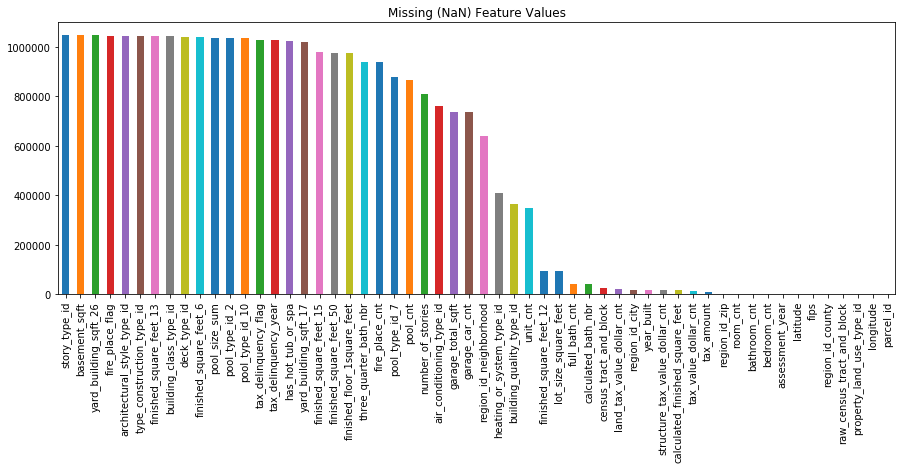

In [7]:
missing_values = df.isnull().sum().sort_values(ascending=False)  #print(missing_values)
# plot values
missing_values.plot.bar(figsize=(15, 5),rot=90, title='Missing (NaN) Feature Values')

In [8]:
train = pd.read_csv("train_2016_v2.csv", parse_dates=["transaction_date"])  
    
#Creating df_total which is used to create train and test datasets
df_total = train.merge(df, how='left', on='parcel_id')

__Observations:__

* Tried to merge 'train_2016_v2.csv' file with 'properties_2016.csv' according to parcel_id and in Time Split based.

In [9]:
from datetime import datetime as dt

start=dt.now()
for c in df_total.columns:
    if df_total[c].dtype == 'object':
        df_total[c]=df_total[c].fillna(0)
        count = 0
        for i in df_total[c]:
            if i != 0:
                df_total[c][count] = 1
            count = count + 1

    else:
        df_total[c]=df_total[c].fillna(-1)               

print("Time taken to run this loop:",dt.now()-start)

Time taken to run this loop: 0:00:48.868404


__Observations:__

* All  'non-object' data type NaN values are filled with '0', just to make sure 0 = False and 1 = True
* Other NaN values are filled with -1

In [10]:
df_total['fire_place_flag'].value_counts()

0    90181
1       94
Name: fire_place_flag, dtype: int64

In [11]:
df_total['tax_delinquency_flag'].value_counts()

0    89662
1      613
Name: tax_delinquency_flag, dtype: int64

In [12]:
df_total.head()

,parcel_id,log_error,transaction_date,air_conditioning_type_id,architectural_style_type_id,basement_sqft,bathroom_cnt,bedroom_cnt,building_class_type_id,building_quality_type_id,...,number_of_stories,fire_place_flag,structure_tax_value_dollar_cnt,tax_value_dollar_cnt,assessment_year,land_tax_value_dollar_cnt,tax_amount,tax_delinquency_flag,tax_delinquency_year,census_tract_and_block
0,11016594,0.0276,2016-01-01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.00,0,-1.0,-1.0
1,14366692,-0.1684,2016-01-01,-1.0,-1.0,-1.0,3.5,4.0,-1.0,-1.0,...,-1.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,-1.0,-1.0
2,12098116,-0.0040,2016-01-01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.00,0,-1.0,-1.0
3,12643413,0.0218,2016-02-01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.00,0,-1.0,-1.0
4,14432541,-0.0050,2016-02-01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.00,0,-1.0,-1.0


__Observations:__

* Formal Checkings.

__My Extra Features__

In [13]:
#Feature Engineering

df_total['property_age'] = 2019 - df_total['year_built']  # property age
df_total['total_rooms'] = df_total['bedroom_cnt'] + df_total['bathroom_cnt']#+ df_total['pool_cnt'] + df_total['room_cnt']
df_total['total_area'] = df_total['basement_sqft'] + df_total['calculated_finished_square_feet'] + df_total['garage_total_sqft']
df_total['total_tax'] = df_total['tax_value_dollar_cnt'] + df_total['land_tax_value_dollar_cnt'] + df_total['tax_amount'] + df_total['structure_tax_value_dollar_cnt']
#df_total['room_size_avg'] = df_total['calculated_finished_square_feet'] / (df_total['room_cnt'] + 1)
df_total['living_area_proportion_1'] = df_total['calculated_finished_square_feet'] / df_total['lot_size_square_feet']
df_total['living_area_proportion_2'] = df_total['finished_square_feet_12'] / df_total['finished_square_feet_15']
df_total['location'] = df_total['latitude'] + df_total['longitude']  # location total
df_total['homes_wi_zip'] = df_total['region_id_zip'].map(df_total['region_id_zip'].value_counts().to_dict())
df_total['has_basement'] = df_total['basement_sqft'].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)
df_total['has_hottub'] = df_total['has_hot_tub_or_spa'].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)
df_total['has_pool'] = df_total['pool_cnt'].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)
df_total['has_ac'] = df_total['air_conditioning_type_id'].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)


__Observations:__

* Adding three new features.

In [14]:
missing_value_dist = df_total.isnull().sum()/df.shape[0]
missing_value_dist = missing_value_dist*100
missing_value_dist.sort_values()

parcel_id                         0.0
region_id_county                  0.0
region_id_neighborhood            0.0
region_id_zip                     0.0
room_cnt                          0.0
story_type_id                     0.0
three_quarter_bath_nbr            0.0
type_construction_type_id         0.0
unit_cnt                          0.0
yard_building_sqft_17             0.0
yard_building_sqft_26             0.0
year_built                        0.0
number_of_stories                 0.0
fire_place_flag                   0.0
structure_tax_value_dollar_cnt    0.0
tax_value_dollar_cnt              0.0
assessment_year                   0.0
land_tax_value_dollar_cnt         0.0
has_hottub                        0.0
has_basement                      0.0
homes_wi_zip                      0.0
location                          0.0
living_area_proportion_2          0.0
living_area_proportion_1          0.0
region_id_city                    0.0
total_tax                         0.0
total_rooms 

__Observation:__

* Just Cross checking, if any feature left with NaN value.

In [15]:
# Converting all data into intergers intstead of floats.

import pandas as pd
from datetime import datetime as dt

start=dt.now()
for c in df_total.columns:
    if df_total[c].dtype != 'object':
        df_total[c] = pd.to_numeric(df_total[c], downcast='signed')
        
print("Time taken to run this loop:",dt.now()-start)

Time taken to run this loop: 0:00:02.307829


In [16]:
df_total[df_total['parcel_id']==12566293]

,parcel_id,log_error,transaction_date,air_conditioning_type_id,architectural_style_type_id,basement_sqft,bathroom_cnt,bedroom_cnt,building_class_type_id,building_quality_type_id,...,total_area,total_tax,living_area_proportion_1,living_area_proportion_2,location,homes_wi_zip,has_basement,has_hottub,has_pool,has_ac
90274,12566293,0.4207,1483056000000000000,-1,-1,-1,1.0,3,-1,7,...,1522,328634.96,0.297424,-1524.0,-84380160,63,1,1,1,1


In [18]:
#Creating a train and test data

X_train = df_total.head(81759)
X_train = X_train.drop('log_error', axis = 1)
X_train = X_train.drop('parcel_id', axis = 1)
X_train = X_train.drop('transaction_date', axis = 1)
y_train = df_total['log_error'].head(81759)


X_test = df_total.tail(8514)
X_test = X_test.drop('log_error', axis = 1)
X_test = X_test.drop('parcel_id', axis = 1)
X_test = X_test.drop('transaction_date', axis = 1)
y_test = df_total['log_error'].tail(8514)

__Observations:__

* Creating Train and Test data for putting model on top of it.

## ML Model: Gradient Boosting Decision Tree

In [19]:
# Grid Search CV
# For GradientBoostingRegressor we can get better results even with shallow depth
# No class_weight = 'balanced' in Regression Problems

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime as dt

start = dt.now()

param_range = [5, 10, 50, 100, 200, 500, 1000]
param_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
tuned_parameters = [{'n_estimators':param_range}, {'max_depth':param_depth}]
model = GridSearchCV(GradientBoostingRegressor(random_state=93), tuned_parameters, scoring=None, cv=3, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Best Model:",model.best_estimator_)
print("\nTime Taken for this Cell:",(dt.now()-start))

C:\Users\Sumii\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Best Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5, presort='auto', random_state=93,
             subsample=1.0, verbose=0, warm_start=False)

Time Taken for this Cell: 0:22:38.944106


__Observations:__

* Used Gradient Boost Regressor, since dimensions are very less (So, thought of using any Tree based Structure).
* Instead of cal_val_score used Grid Search CV for faster Computations.
* Took very high depth, because GBDTs can handle low bias and high variances.
* Took n_estimators and max_depth as hyperparameters.
* Kept 'n_jobs = -1', to run the GridSearchCV faster.

In [20]:
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode(connected=True)
#trace_1 = go.Scatter3d(x = model.cv_results_['param_n_estimators'], y = model.cv_results_['param_max_depth'], 
#                       z = model.cv_results_['mean_test_score'], mode='markers',
#                       marker = dict(size = 6, colorscale = 'Viridis', opacity= 0.8))

trace_1 = go.Scatter3d(x = param_range, y = param_depth, z = model.cv_results_['mean_test_score'], mode='lines+markers',
                       marker = dict(size = 6, colorscale = 'Viridis', opacity = 0.8), line = dict(color = '#1f77b4',width = 1))
data = [trace_1]
layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0), title ='3D Plot',
                   scene = dict( xaxis = dict(title='param_n_estimators'), yaxis = dict(title='param_max_depth'), 
                                zaxis = dict( title='mean_test_score')))

fig = go.Figure(data = data, layout = layout)
offline.iplot(fig, filename = 'pandas-brownian-motion-3d', validate = False)

In [21]:
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode(connected=True)
#trace_1 = go.Scatter3d(x = model.cv_results_['param_n_estimators'], y = model.cv_results_['param_max_depth'], 
#                       z = model.cv_results_['mean_test_score'], mode='markers',
#                       marker = dict(size = 6, colorscale = 'Viridis', opacity= 0.8))

trace_1 = go.Scatter3d(x = param_range, y = param_depth, z = model.cv_results_['mean_train_score'], mode='lines+markers',
                       marker = dict(size = 6, colorscale = 'Viridis', opacity = 0.8), line = dict(color = '#1f77b4',width = 1))
data = [trace_1]
layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0), title ='3D Plot',
                   scene = dict( xaxis = dict(title='param_n_estimators'), yaxis = dict(title='param_max_depth'), 
                                zaxis = dict( title='mean_train_score')))

fig = go.Figure(data = data, layout = layout)
offline.iplot(fig, filename = 'pandas-brownian-motion-3d', validate = False)

### Observations

* Took n_estimators = 5 and max_depth = 3.
* Using Train and Test Score Curves we decided to go for those above values.

In [22]:
# Reporting Metrics

import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(max_depth=3, n_estimators=5, random_state=93)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred, multioutput='uniform_average')
print("Train MSE =",mse)

Train MSE = 0.022095413182265936


In [32]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "max_depth", "n_estimators", "MSE"]

x.add_row(["GBDT", 3, 5, 0.0220954])
print(x)

+-------+-----------+--------------+-----------+
| Model | max_depth | n_estimators |    MSE    |
+-------+-----------+--------------+-----------+
|  GBDT |     3     |      5       | 0.0220954 |
+-------+-----------+--------------+-----------+


## DL Model: Multilayer Perceptron with 2 Hidden Layers

In [26]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

# Parameters
#output_dim = 10
input_dim = X_train.shape[1]
batch_size = 64
nb_epoch = 10

# Building a model Multilayer perceptron

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               17408     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total para

__Observations:__

* Added all Dense Layers + Batch Normalizations + Dropouts + Sigmoid Layers.
    * Hidden Layers = 2
    * Act Func = ReLu
    * Optimizor = Adam
    * Initialisor = He Normal
    * Metric = Mean Squared Error
* Printed Model summary too.

In [27]:
from datetime import datetime as dt

start = dt.now()

# Fitting the model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

print("\nTime taken for this cell:",dt.now()-start)

Train on 81759 samples, validate on 8514 samples
Epoch 1/10
81759/81759 [==============================] - 10s 118us/step - loss: 0.3523 - mean_squared_error: 0.3523 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 2/10
81759/81759 [==============================] - 8s 97us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 3/10
81759/81759 [==============================] - 9s 113us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 4/10
81759/81759 [==============================] - 8s 102us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 5/10
81759/81759 [==============================] - 8s 96us/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 6/10
81759/81759 [==============================] - 8s 95us/step - loss: 0.0271 - mean_squared_error: 0.02

In [28]:
# Function for Plotting Train and Test Losses

%matplotlib notebook
import matplotlib.pyplot as plt
#import numpy as np
#import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.xticks(range(nb_epoch+1))
    fig.canvas.draw()

Test MSE: 0.022898856531640494


<IPython.core.display.Javascript object>


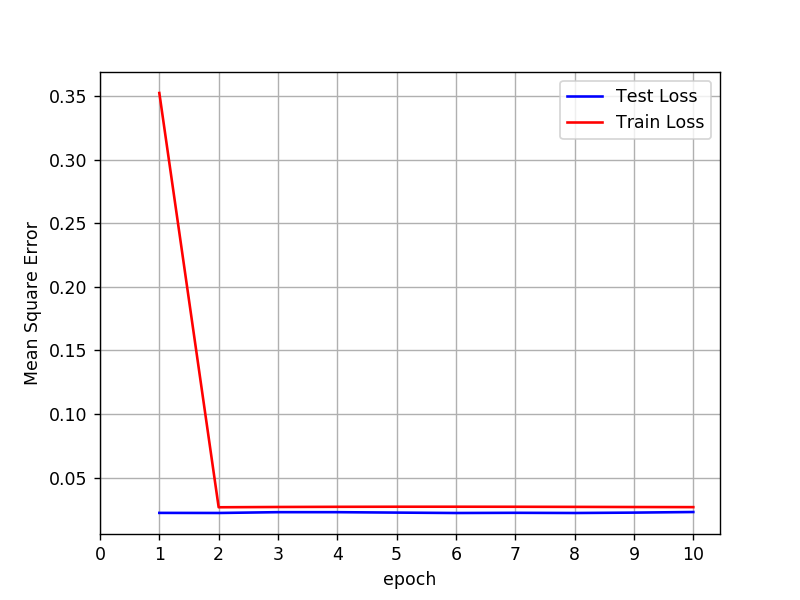

In [29]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test MSE:', score[0]) 
#print('Test accuracy:', score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Mean Square Error')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [31]:
# Pretty Table

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Hidden Layers", "Act Func", "Optimizor", "Initializer", "Metric", "Loss"]

x.add_row(["MLP", (256, 64), "ReLu", "Adam", "he_norm", "Mean Square Error", 0.0228988])

print(x)

+-------+---------------+----------+-----------+-------------+-------------------+-----------+
| Model | Hidden Layers | Act Func | Optimizor | Initializer |       Metric      |    Loss   |
+-------+---------------+----------+-----------+-------------+-------------------+-----------+
|  MLP  |   (256, 64)   |   ReLu   |    Adam   |   he_norm   | Mean Square Error | 0.0228988 |
+-------+---------------+----------+-----------+-------------+-------------------+-----------+


## Procedure:

* Initially Changed all the feature names for my better understandings.
* Removed few features which are 'Alpha-Numeric'.
* Removed 'Transaction Date' feature also.
* Done with Pre-Processing
* Created Train and Test data using Time Based Split.
* Designed 2 Models
    1. Machine Learning Model (GBDT): Chose this model because of very low dimensions and tree based models are best fit for them.
    2. Deep-Learning Model (MLPs)
* Found MSEs for both Models and started comparing.


## Observations:

__1. ML Model__
    * MSE is very less
    * Time Taken: 17:43 mins
    * Done with Grid Search CV and found best parameters
    
    
__2. DL Model__
    * MSE is very less compared to Machine Learning Model.
    * Time Taken: 02:44 mins, which is faster than ML Model.
    * In the first epoch itself it reached to very low MSE value.


3. Both MSEs are very less which is quite nearer to winner of that data
    * Winner MSE = __0.0740861__.
    * My MSE = __0.0220954__ (ML Model) and __0.0228988__ (DL Model).